In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

from frechetdist import frdist


In [2]:
P=[[1,1], [2,1], [2,2]]
Q=[[1, 1], [2,1], [2,1]]
frdist(P,Q)

1.0

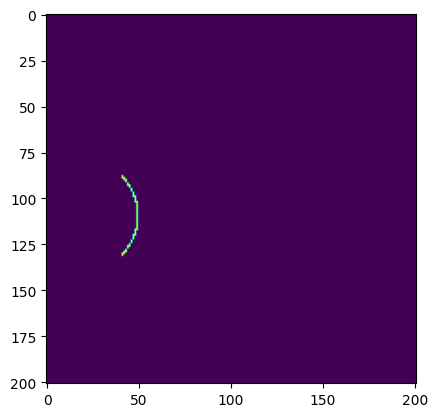

In [3]:
img = np.zeros((201,201))
line1 = []
for theta in np.arange(np.pi / 4, 3 * np.pi/4,0.01):
    x = 110+30*np.cos(theta)
    y = 20+30*np.sin(theta)
    line1.append([x,y])
    img[int(x),int(y)]=1
plt.imshow(img)
plt.show()

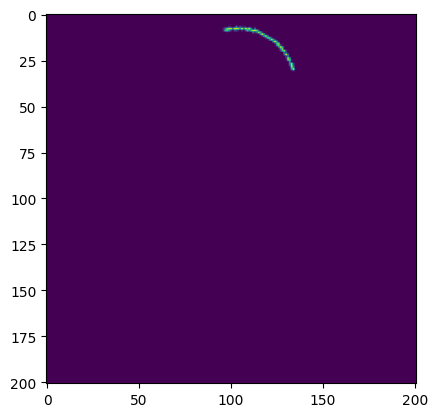

In [4]:
plt.imshow(skimage.transform.rotate(img, 60, center=(0,0)))

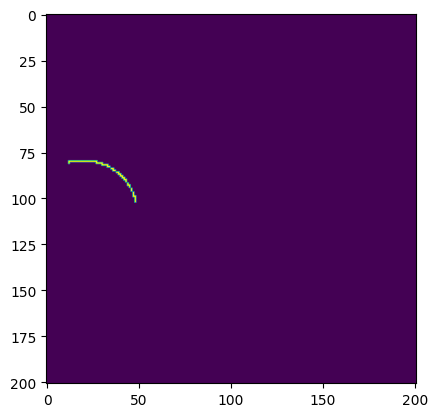

In [5]:
img = np.zeros((201,201))
line2 = []
for theta in np.arange(np.pi / 4 + np.pi / 3, 3 * np.pi/4 + np.pi / 3,0.01):
    x = 110+30*np.cos(theta)
    y = 20+30*np.sin(theta)
    line2.append([x,y])
    img[int(x),int(y)]=1
plt.imshow(img)
plt.show()

In [6]:
frdist(line1,line2)

30.000000000000004

In [7]:
p1 = line1[0]
p2 = line1[-1]

new_p1 = line2[0]
new_p2 = line2[-1]

A = np.array([
    [p1[0], -p1[1], 1, 0],
    [p1[1], p1[0], 0, 1],
    [p2[0], -p2[1], 1, 0],
    [p2[1], p2[0], 0, 1],
])

b = np.array([new_p1[0], new_p1[1], new_p2[0], new_p2[1]])

params = np.linalg.solve(A, b)
print(params)

[  0.5          0.8660254   72.32050808 -85.26279442]


In [8]:
def estimate_transform_params(start1, start2, end1, end2):
    """
    returns the transform parameters cos(alpha), sin(alpha), a, b (a, b - shift, alpha - rotating angle)
    """
    A = np.array([
        [start1[0], -start1[1], 1, 0],
        [start1[1], start1[0], 0, 1],
        [start2[0], -start2[1], 1, 0],
        [start2[1], start2[0], 0, 1],
    ])
    b = np.array([end1[0], end1[1], end2[0], end2[1]])
    params = np.linalg.solve(A, b)
    return params

In [9]:
print(np.sin(np.pi/3), np.cos(np.pi/3))

0.8660254037844386 0.5000000000000001


In [10]:
print(estimate_transform_params(p1, p2, new_p1, new_p2))

[  0.5          0.8660254   72.32050808 -85.26279442]


In [11]:
def transform_line(line, trasform_params):
    """
    line - np.array, shape (n, 2)
    trasform_params - tuple (cos, sin, a, b) of transform parameters line -> line
    returns transformed line
    """
    cos, sin, a, b = trasform_params
    transformed_line = np.zeros(line.shape)
    transformed_line[:, 0] = line[:, 0] * cos - line[:, 1] * sin + a
    transformed_line[:, 1] = line[:, 0] * sin + line[:, 1] * cos + b
    return transformed_line

def estimate_mean_squared_transformation_error(line1, line2, trasform_params):
    """
    line1, line2 - np.arrays, shape (n, 2)
    transforms_params - tuple (cos, sin, a, b) of transform parameters line1 -> line2
    returns mean squared error
    """
    transformed_line1 = transform_line(line1, trasform_params)
    return np.linalg.norm(line2 - transformed_line1)
    
    
    

In [12]:
line1 = np.array(line1)
line2 = np.array(line2)
print(line1.shape)

(158, 2)


In [13]:
estimate_mean_squared_transformation_error(line1, line2, params)

1.8654284293724396e-13